In [154]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt

# First we model the translationally invariant case

In [301]:
lattice = pb.Lattice(a1=[1, 0], a2=[1/2, sqrt(3)/2])
N = 4
lattice.add_sublattices(
    ('A', np.array([0, 1])*1/N), ('B', np.array([-sqrt(3)/2, -1/2])*1/N), ('C', np.array([sqrt(3)/2, -1/2])*1/N)  # add an atom called 'A' at position [0, 0]
)
t = 0.5
t2 = 1
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 0], 'B', 'C', t),
    ([0, 0], 'A', 'C', t),
    ([0, 0], 'A', 'B', t),
    ([0, 1], 'A', 'B', t2),
    ([1, 0], 'C', 'B', t2),
    ([1, -1], 'C', 'A', t2)

)

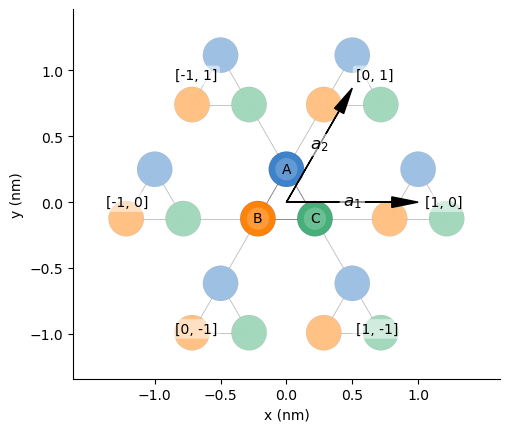

In [302]:
lattice.plot()

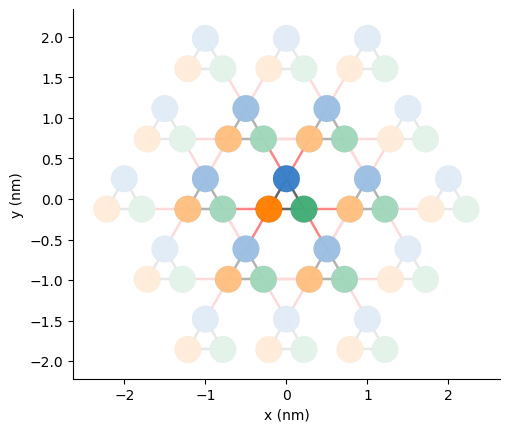

In [164]:
model = pb.Model(
    lattice,
    pb.translational_symmetry()
)

#model = pb.Model(
#    lattice,
#)
model.plot(num_periods=2,
          hopping = {
  "width": 3,
})

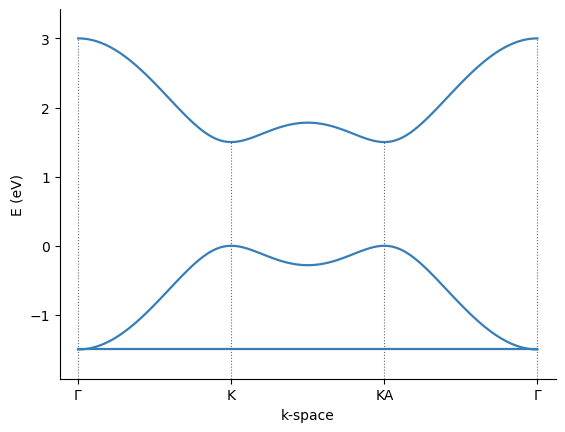

In [165]:
solver = pb.solver.lapack(model)
G1, G2 = lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -1/3*G1+1/3*G2
KA = 1/3*G1+2/3*G2
bands = solver.calc_bands(Gamma, K, KA, Gamma)
bands.plot(point_labels=[r'$\Gamma$', 'K', 'KA',  r'$\Gamma$'])

# Cutout 1

In [394]:
a1 = np.array([1, 0])
a2 = np.array([1/2, sqrt(3)/2])
a3 = np.array([-1/2, sqrt(3)/2])

lattice = pb.Lattice(a1=a1, a2=a3)

In [395]:
N = 4
M = 30
cladding = 15
for i in range(-M, M):
    for j in range(-M, M):
        k = i 
        if cladding/3 - k < 0:
            continue
        if j + cladding/3 < 0: 
            continue
        if k - j + cladding/3 < 0:
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([0, 1])*1/N +i*a1+j*a3), (f'B{i} {j}', np.array([-sqrt(3)/2, -1/2])*1/N +i*a1+j*a3),
            (f'C{i} {j}', np.array([sqrt(3)/2, -1/2])*1/N+i*a1+j*a3))

In [396]:
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i+1} {j+1}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'B{i+1} {j}', t2)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'A{i} {j-1}', t2)
        except: 
            pass 

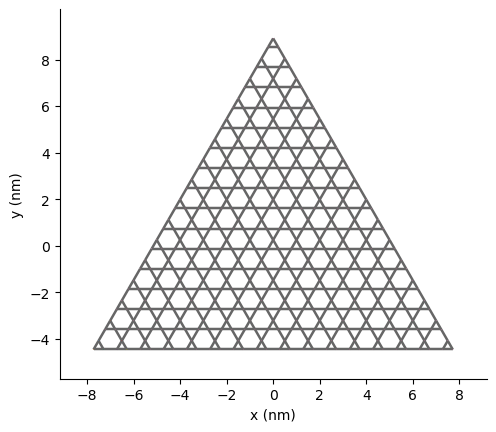

In [397]:
model = pb.Model(
    lattice,
)

model.plot(num_periods=1,
          hopping = {
  "width": 3,
})

In [398]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues

# Bands for cutout 1- note that there are no corner states

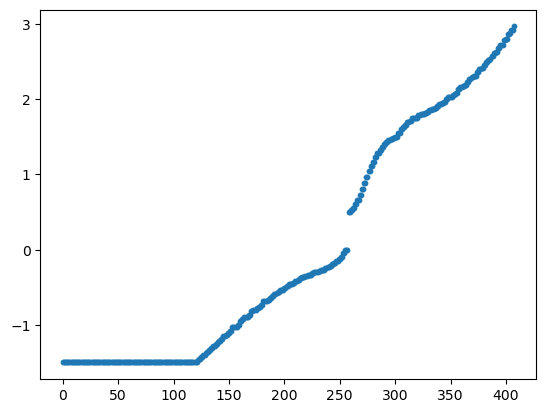

In [399]:
plt.scatter(range(0, np.size(bands)), bands, s=10)
#plt.ylim(0, 0.8)
#plt.xlim(150, 200)

# Cutout 2 

In [529]:
a1 = np.array([1, 0])
a2 = np.array([1/2, sqrt(3)/2])
a3 = np.array([-1/2, sqrt(3)/2])

lattice = pb.Lattice(a1=a1, a2=a3)

N = 4
M = 30
cladding = 18
for i in range(-M, M):
    for j in range(-M, M):
        k = -i 
        l = -j
        if cladding/3 - k < 0:
            continue
        if l + cladding/3 < 0: 
            continue
        if k - l + cladding/3 < 0:
            continue
        lattice.add_sublattices(
            (f'A{i} {j}', np.array([0, 1])*1/N +i*a1+j*a3), (f'B{i} {j}', np.array([-sqrt(3)/2, -1/2])*1/N +i*a1+j*a3),
            (f'C{i} {j}', np.array([sqrt(3)/2, -1/2])*1/N+i*a1+j*a3))

In [530]:
for i in range(-M, M):
    for j in range(-M, M):
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'B{i} {j}', f'C{i} {j}', t)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'A{i} {j}', f'B{i+1} {j+1}', t2)
        except: 
            pass
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'B{i+1} {j}', t2)
        except: 
            pass 
        try:
            lattice.add_one_hopping([0, 0], f'C{i} {j}', f'A{i} {j-1}', t2)
        except: 
            pass 

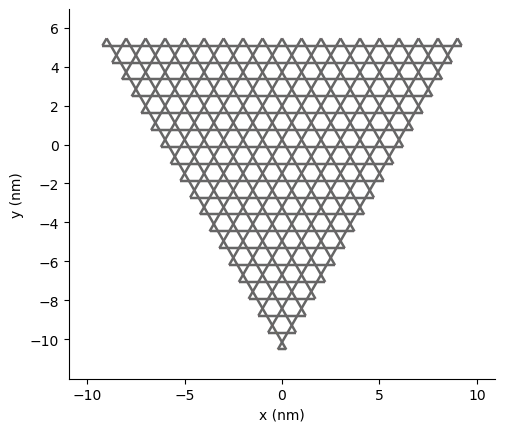

In [531]:
model = pb.Model(
    lattice,
)

model.plot(num_periods=1,
          hopping = {
  "width": 3,
})

In [532]:
solver = pb.solver.lapack(model)
bands = solver.eigenvalues

# Bands for Cutout 2- note 3 degenerate corner states

(0.6, 0.7)

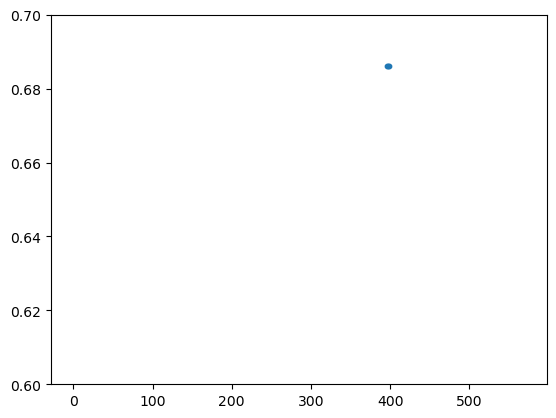

In [536]:
plt.scatter(range(0, np.size(bands)), bands, s=10)
#plt.xlim(117, 119)
plt.ylim(0.6, 0.7)

# LDOS evaluated at corner state energy

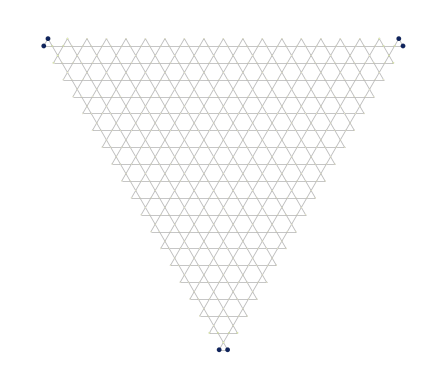

In [537]:
ldos = solver.calc_spatial_ldos(energy=0.68, broadening=0.01)  # eV
ldos.plot(site_radius=(0.03, 0.12))
plt.gca().axis('off');